In [4]:
!pip install tika



In [13]:
# Setup and define function for parsing
from tika import parser
def convertPdf2TxtWithTika(in_pdf_file, out_text_file):
    # Load a file and extract information
    print ("INFO: - reading file = " + in_pdf_file)
    
    raw = parser.from_file(in_pdf_file)
    text = raw['content']
    
    ## Post-processing explained at: 
    # https://medium.com/@justinboylantoomey/fast-text-extraction-with-python-and-tika-41ac34b0fe61
    # Convert to string
    text = str(text)
    # Ensure text is utf-8 formatted
    safe_text = text.encode('utf-8', errors='ignore')
    # Escape any \ issues
    safe_text = str(safe_text).replace('\\', '\\\\').replace('"', '\\"')
    
    # Write out extracted content
    text_pdf = open(out_text_file, 'w')
    print ("INFO: - writing file = " + out_text_file)
    text_pdf.write(text)
    text_pdf.close()

In [16]:
import os
import glob
from tika import parser  # Assuming convertPdf2TxtWithTika uses tika for PDF parsing

# Set input and output paths correctly
inpath = r'C:\Exercise1-Resume\My_Resume\Input\\'
outpath = r'C:\Exercise1-Resume\My_Resume\Output\\'

count = 0
for file in glob.glob(inpath + '*.pdf'):
    justfile = os.path.basename(file).replace(".pdf", "")
    print('INFO: processing file = ' + justfile)
    output_file = os.path.join(outpath, justfile + '.txt')
    print('INFO: - in = ' + file + ', out = ' + output_file)
    
    # Convert PDF to text using your function
    convertPdf2TxtWithTika(file, output_file)
    count += 1

print('INFO: processed total files = ' + str(count))


INFO: processing file = Rasoul_Nikmehr_Resume
INFO: - in = C:\Exercise1-Resume\My_Resume\Input\Rasoul_Nikmehr_Resume.pdf, out = C:\Exercise1-Resume\My_Resume\Output\\Rasoul_Nikmehr_Resume.txt
INFO: - reading file = C:\Exercise1-Resume\My_Resume\Input\Rasoul_Nikmehr_Resume.pdf
INFO: - writing file = C:\Exercise1-Resume\My_Resume\Output\\Rasoul_Nikmehr_Resume.txt
INFO: processed total files = 1


In [24]:
# Now we define a function to do word cloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

In [25]:
# Open file and get content
file = r'C:\Exercise1-Resume\My_Resume\Output\Rasoul_Nikmehr_Resume.txt'
file_handle = open(file, 'r')
content = str(file_handle.read()).split()
file_handle.close()

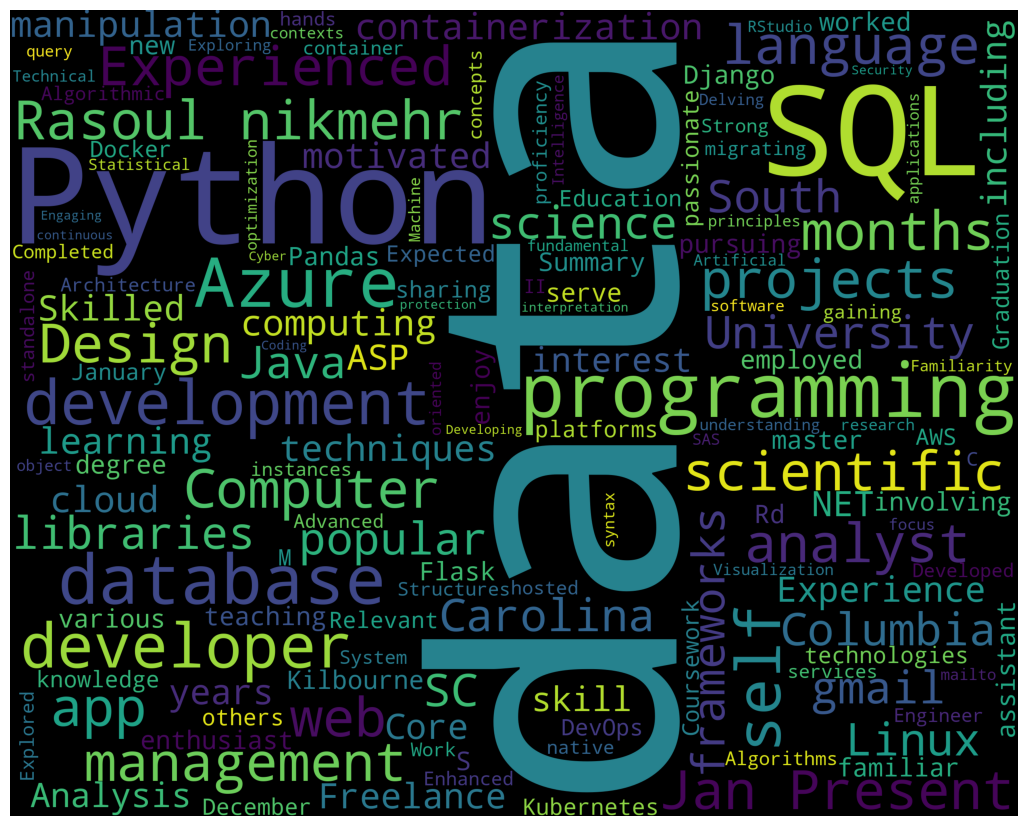

In [27]:

# Draw the visualization
wordcloud_draw(content)